# Loan predictions

## Problem Statement

We want to automate the loan eligibility process based on customer details that are provided as online application forms are being filled. You can find the dataset [here](https://drive.google.com/file/d/1h_jl9xqqqHflI5PsuiQd_soNYxzFfjKw/view?usp=sharing). These details concern the customer's Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and other things as well. 

|Variable| Description|
|: ------------- |:-------------|
|Loan_ID| Unique Loan ID|
|Gender| Male/ Female|
|Married| Applicant married (Y/N)|
|Dependents| Number of dependents|
|Education| Applicant Education (Graduate/ Under Graduate)|
|Self_Employed| Self employed (Y/N)|
|ApplicantIncome| Applicant income|
|CoapplicantIncome| Coapplicant income|
|LoanAmount| Loan amount in thousands|
|Loan_Amount_Term| Term of loan in months|
|Credit_History| credit history meets guidelines|
|Property_Area| Urban/ Semi Urban/ Rural|
|Loan_Status| Loan approved (Y/N)



### Explore the problem in following stages:

1. Hypothesis Generation – understanding the problem better by brainstorming possible factors that can impact the outcome
2. Data Exploration – looking at categorical and continuous feature summaries and making inferences about the data.
3. Data Cleaning – imputing missing values in the data and checking for outliers
4. Feature Engineering – modifying existing variables and creating new ones for analysis
5. Model Building – making predictive models on the data

## 1. Hypothesis Generation

Generating a hypothesis is a major step in the process of analyzing data. This involves understanding the problem and formulating a meaningful hypothesis about what could potentially have a good impact on the outcome. This is done BEFORE looking at the data, and we end up creating a laundry list of the different analyses which we can potentially perform if data is available.

#### Possible hypotheses
Which applicants are more likely to get a loan

1. Applicants having a credit history 
2. Applicants with higher applicant and co-applicant incomes
3. Applicants with higher education level
4. Properties in urban areas with high growth perspectives

Do more brainstorming and create some hypotheses of your own. Remember that the data might not be sufficient to test all of these, but forming these enables a better understanding of the problem.

## 2. Data Exploration
Let's do some basic data exploration here and come up with some inferences about the data. Go ahead and try to figure out some irregularities and address them in the next section. 

In [10]:
# import libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [12]:
df = pd.read_csv('../data/data.csv')

In [13]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


One of the key challenges in any data set are missing values. Lets start by checking which columns contain missing values.

In [14]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Look at some basic statistics for numerical variables.

In [15]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


1. How many applicants have a `Credit_History`? (`Credit_History` has value 1 for those who have a credit history and 0 otherwise)
2. Is the `ApplicantIncome` distribution in line with your expectation? Similarly, what about `CoapplicantIncome`?
3. Tip: Can you see a possible skewness in the data by comparing the mean to the median, i.e. the 50% figure of a feature.


In [16]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

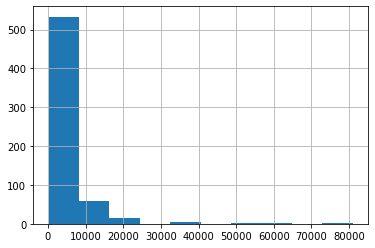

In [19]:
df['ApplicantIncome'].hist()
plt.show()

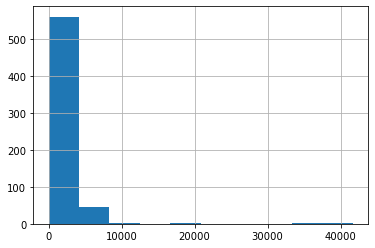

In [21]:
df['CoapplicantIncome'].hist()
plt.show()

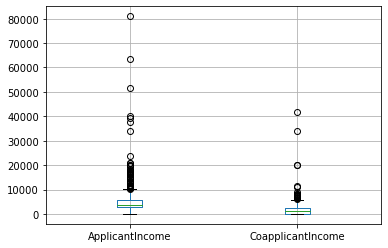

In [23]:
df.boxplot(column=['ApplicantIncome','CoapplicantIncome'])
plt.show()

Let's discuss nominal (categorical) variable. Look at the number of unique values in each of them.

In [24]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [25]:
pd.crosstab(df ['Credit_History'], df ['Loan_Status'], margins=True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,97,378,475
All,179,385,564


Explore further using the frequency of different categories in each nominal variable. Exclude the ID obvious reasons.

In [26]:
nominal_vars = ["Gender", "Married", "Dependents", "Education", "Self_Employed", "Property_Area", "Loan_Status"]

for var in nominal_vars:
    freq_table = df[var].value_counts()
    print("Frequency table for", var)
    print(freq_table)
    print()

Frequency table for Gender
Male      489
Female    112
Name: Gender, dtype: int64

Frequency table for Married
Yes    398
No     213
Name: Married, dtype: int64

Frequency table for Dependents
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

Frequency table for Education
Graduate        480
Not Graduate    134
Name: Education, dtype: int64

Frequency table for Self_Employed
No     500
Yes     82
Name: Self_Employed, dtype: int64

Frequency table for Property_Area
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

Frequency table for Loan_Status
Y    422
N    192
Name: Loan_Status, dtype: int64



### Distribution analysis

Study distribution of various variables. Plot the histogram of ApplicantIncome, try different number of bins.



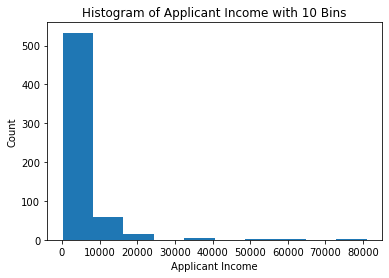

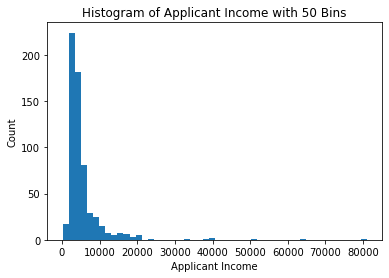

In [27]:
# Plot the histogram of ApplicantIncome with 10 bins
plt.hist(df["ApplicantIncome"], bins=10)
plt.xlabel("Applicant Income")
plt.ylabel("Count")
plt.title("Histogram of Applicant Income with 10 Bins")
plt.show()

# Plot the histogram of ApplicantIncome with 50 bins
plt.hist(df["ApplicantIncome"], bins=50)
plt.xlabel("Applicant Income")
plt.ylabel("Count")
plt.title("Histogram of Applicant Income with 50 Bins")
plt.show()


Look at box plots to understand the distributions. 

<AxesSubplot:xlabel='ApplicantIncome'>

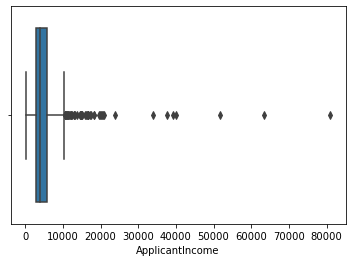

In [28]:
sns.boxplot(x="ApplicantIncome", data=df)

Look at the distribution of income segregated  by `Education`

<AxesSubplot:xlabel='Education', ylabel='ApplicantIncome'>

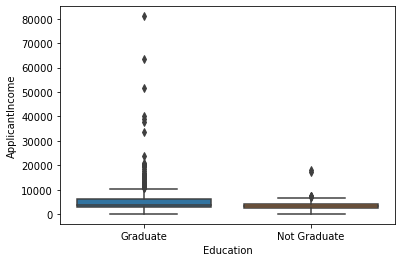

In [29]:
sns.boxplot(x="Education", y="ApplicantIncome", data=df)

Look at the histogram and boxplot of LoanAmount

<AxesSubplot:xlabel='LoanAmount', ylabel='Count'>

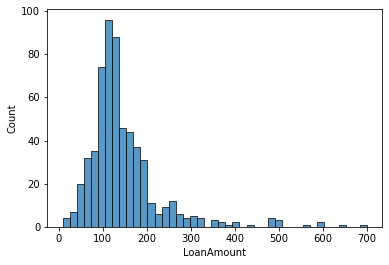

In [30]:
sns.histplot(x="LoanAmount", data=df)

<AxesSubplot:xlabel='LoanAmount'>

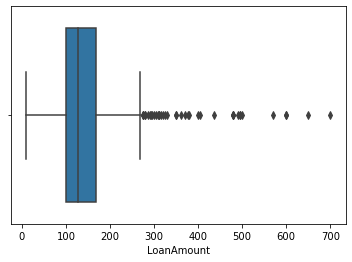

In [31]:
sns.boxplot(x="LoanAmount", data=df)

There might be some extreme values. Both `ApplicantIncome` and `LoanAmount` require some amount of data munging. `LoanAmount` has missing and well as extreme values values, while `ApplicantIncome` has a few extreme values, which demand deeper understanding. 

In the case of the LoanAmount variable, there might be missing values as well as extreme values, which can skew the distribution of the data. We can handle missing values by either imputing them with the mean, median, or mode of the variable, or by dropping the rows containing the missing values. However, when dealing with extreme values, we need to be careful about how we handle them. One approach is to cap the extreme values at a certain threshold, such as the 99th percentile or a value that makes sense based on domain knowledge.

Similarly, the ApplicantIncome variable might also have extreme values that require deeper understanding. We can use techniques such as log transformations to handle skewed distributions and identify the outliers that need to be addressed.

In summary, handling missing and extreme values in the LoanAmount and ApplicantIncome variables can help us obtain a better understanding of their distributions and identify any outliers that might require further investigation. This can improve the accuracy and reliability of statistical analyses and machine learning models based on these variables.

### Categorical variable analysis

Try to understand categorical variables in more details using `pandas.DataFrame.pivot_table` and some visualizations.

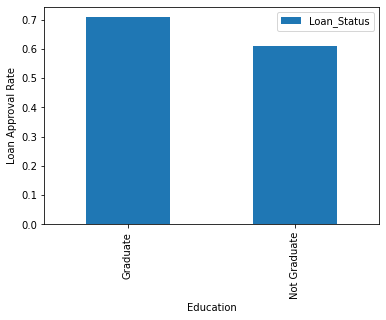

In [32]:
edu_loan_pivot = pd.pivot_table(df, index=['Education'], values=['Loan_Status'], aggfunc=lambda x: x.map({'Y':1, 'N':0}).mean())

edu_loan_pivot.plot(kind='bar')
plt.ylabel('Loan Approval Rate')
plt.show()

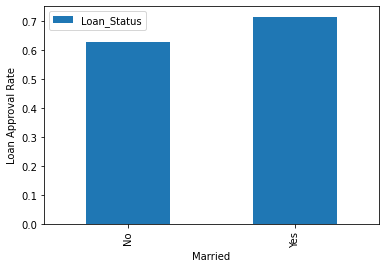

In [33]:
married_loan_pivot = pd.pivot_table(df, index=['Married'], values=['Loan_Status'], aggfunc=lambda x: x.map({'Y':1, 'N':0}).mean())

married_loan_pivot.plot(kind='bar')
plt.ylabel('Loan Approval Rate')
plt.show()

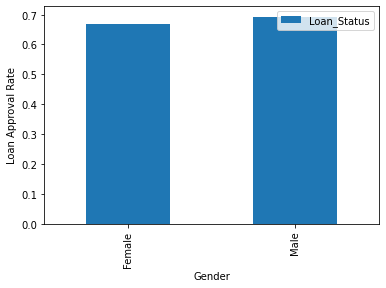

In [34]:
gender_loan_pivot = pd.pivot_table(df, index=['Gender'], values=['Loan_Status'], aggfunc=lambda x: x.map({'Y':1, 'N':0}).mean())

gender_loan_pivot.plot(kind='bar')
plt.ylabel('Loan Approval Rate')
plt.show()

## 3. Data Cleaning

This step typically involves imputing missing values and treating outliers. 

### Imputing Missing Values

Missing values may not always be NaNs. For instance, the `Loan_Amount_Term` might be 0, which does not make sense.



Impute missing values for all columns. Use the values which you find most meaningful (mean, mode, median, zero.... maybe different mean values for different groups)

In [35]:
# Impute missing values for categorical variables with mode
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)


In [36]:
# Impute missing values for numerical variables with mean
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(), inplace=True)

In [37]:
# Impute missing values for Credit_History variable with median based on Property_Area
df['Credit_History'] = df.groupby(['Property_Area'])['Credit_History'].transform(lambda x: x.fillna(x.median()))

In [38]:
# print the updated dataset to verify the imputation
print(df.head())

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0  146.412162             360.0   
1             4583             1508.0  128.000000             360.0   
2             3000                0.0   66.000000             360.0   
3             2583             2358.0  120.000000             360.0   
4             6000                0.0  141.000000             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

In [39]:
# Convert all non-numeric values to number
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
cat=['Gender','Married','Dependents','Education','Self_Employed','Credit_History','Property_Area']
for var in cat:
    le = preprocessing.LabelEncoder()
    df[var]=le.fit_transform(df[var].astype('str'))
df.dtypes

Loan_ID               object
Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History         int32
Property_Area          int32
Loan_Status           object
dtype: object

In [40]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1,2,Y
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1,0,N
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1,2,Y
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1,2,Y
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1,2,Y


### Extreme values
Try a log transformation to get rid of the extreme values in `LoanAmount`. Plot the histogram before and after the transformation

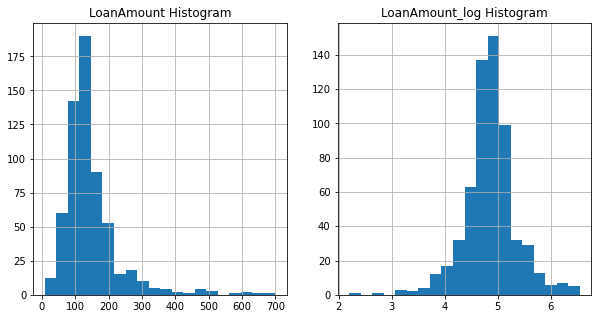

In [41]:
# perform log transformation on LoanAmount
df['LoanAmount_log'] = np.log(df['LoanAmount'])

# plot histogram of LoanAmount
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
df['LoanAmount'].hist(bins=20)
plt.title('LoanAmount Histogram')

# plot histogram of LoanAmount_log
plt.subplot(1,2,2)
df['LoanAmount_log'].hist(bins=20)
plt.title('LoanAmount_log Histogram')

plt.show()

Combine both incomes as total income and take a log transformation of the same.

<AxesSubplot:>

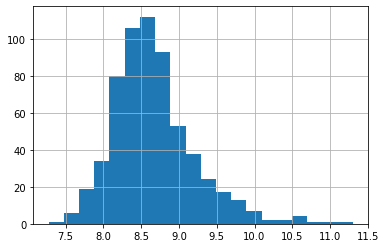

In [43]:
# create new column TotalIncome that combines ApplicantIncome and CoapplicantIncome
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']

# take log transformation of TotalIncome
df['TotalIncome_log'] = np.log(df['TotalIncome'])
df['TotalIncome_log'].hist(bins=20) 

## 4. Building a Predictive Model

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [53]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'LoanAmount_log', 'TotalIncome', 'TotalIncome_log'],
      dtype='object')

In [57]:
# select the relevant features and target variable
X = df[['Credit_History', 'TotalIncome_log', 'LoanAmount_log', 'Property_Area', 'Education']]
y = df['Loan_Status']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [59]:
# Create logistic regression object
model = LogisticRegression()

# Train the model using the training sets
model.fit(X_train, y_train)

#Predict Output
predicted= model.predict(X_test)

#Print accuracy
accuracy = metrics.accuracy_score(predicted,y_test)
print ("Accuracy : %s" % "{0:.3%}".format(accuracy))

Accuracy : 78.378%


Try paramater grid search to improve the results

In [60]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the random forest classifier object
rfc = RandomForestClassifier(random_state=42)

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and score
print('Best parameters: ', grid_search.best_params_)
print('Best score: ', grid_search.best_score_)

Best parameters:  {'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Best score:  0.8204651162790698


## 5. Using Pipeline
If you didn't use pipelines before, transform your data prep, feat. engineering and modeling steps into Pipeline. It will be helpful for deployment.

The goal here is to create the pipeline that will take one row of our dataset and predict the probability of being granted a loan.

`pipeline.predict(x)`

In [61]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.linear_model import LogisticRegression

In [62]:
# define numerical and categorical features
num_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
cat_features = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area']

In [63]:
# create transformers for numerical and categorical features
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# define the preprocessor that applies the transformers to the correct columns
preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, num_features),
    ('cat', cat_transformer, cat_features)
])

# define the feature engineering step using a function transformer
log_transformer = FunctionTransformer(np.log1p, validate=True)

# define the final model
model = LogisticRegression()

# define the pipeline that combines the preprocessor, feature engineering, and model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('log_transformer', log_transformer),
    ('model', model)
])

## 6. Deploy your model to cloud and test it with PostMan, BASH or Python

In [64]:
import pandas as pd
from sklearn.datasets import load_wine

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline, FeatureUnion

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest

from sklearn.ensemble import RandomForestClassifier

import pickle

In [65]:
# own class that can be inserted to pipeline as any other sklearn object.
class RawFeats:
    def __init__(self, feats):
        self.feats = feats

    def fit(self, X, y=None):
        pass


    def transform(self, X, y=None):
        return X[self.feats]

    def fit_transform(self, X, y=None):
        self.fit(X)
        return self.transform(X)


# features we want to keep for PCA
feats = ['Credit_History', 'TotalIncome_log', 'LoanAmount_log', 'Property_Area', 'Education']
# creating class object with indexes we want to keep.
raw_feats = RawFeats(feats)

In [66]:
sc = StandardScaler()
pca = PCA(n_components=2)

In [67]:
selection = SelectKBest(k=4)

In [68]:
rf = RandomForestClassifier()

In [69]:
PCA_pipeline = Pipeline([
    ("rawFeats", raw_feats),
    ("scaler", sc),
    ("pca", pca)
])

kbest_pipeline = Pipeline([("kBest", selection)])

In [70]:
all_features = FeatureUnion([
    ("pcaPipeline", PCA_pipeline), 
    ("kBestPipeline", kbest_pipeline)
])

In [71]:
main_pipeline = Pipeline([
    ("features", all_features),
    ("rf", rf)
])

In [78]:
# set up our parameters grid
param_grid = {"features__pcaPipeline__pca__n_components": [1, 2, 3],
                  "features__kBestPipeline__kBest__k": [1, 2, 3],
                  "rf__n_estimators":[2, 5, 10],
                  "rf__max_depth":[2, 4, 6]
             }

# create a Grid Search object
grid_search = GridSearchCV(main_pipeline, param_grid, n_jobs = -1, verbose=10, refit=True)    

# fit the model and tune parameters
df_copy = df.copy()
df_copy.drop('Loan_ID', axis=1, inplace=True)
le = LabelEncoder()
y= le.fit_transform(df_copy['Loan_Status'])
df_copy.drop('Loan_Status', axis=1, inplace=True)
grid_search.fit(df_copy, y)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(estimator=Pipeline(steps=[('features',
                                        FeatureUnion(transformer_list=[('pcaPipeline',
                                                                        Pipeline(steps=[('rawFeats',
                                                                                         <__main__.RawFeats object at 0x000001EF9787CDC0>),
                                                                                        ('scaler',
                                                                                         StandardScaler()),
                                                                                        ('pca',
                                                                                         PCA(n_components=2))])),
                                                                       ('kBestPipeline',
                                                                        Pipeline(steps=[('kBest',
                

In [79]:
print(grid_search.best_params_)

{'features__kBestPipeline__kBest__k': 1, 'features__pcaPipeline__pca__n_components': 2, 'rf__max_depth': 4, 'rf__n_estimators': 10}


In [80]:
pickle.dump( grid_search, open( "model.p", "wb" ) )

API

In [ ]:
import requests
URL = "http://<SERVERIP>/scoring"
# sending get request and saving the response as response object 
json_data = {}
r = requests.post(url = URL, json = json_data) 

In [ ]:
print(r.json())